# Medlytics Final Project Notebook

## Importing Libraries

In [ ]:
# Import basic system and numerical packages
import os
import re
!pip install numpy==1.22
import numpy as np
import pandas as pd

# Import statistical and signal processing functions
from scipy import signal
import scipy.stats.mstats as mstats
from sklearn import metrics

# Import the scikit-learn functions and models
from sklearn.model_selection import train_test_split
from sklearn import tree

# Import audio i/o and playing functions
import scipy.io.wavfile
from IPython.display import Audio

# Import plotting functionality
import matplotlib
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
sns.set()

#librosa
!sudo apt-get update && sudo apt-get install -y libsndfile1
!pip install librosa
import librosa

from pydub import AudioSegment
from scipy.io import wavfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 123.7 MB/s eta 0:00:00


## Data Processing

In [ ]:
def features(data):
    arr = dict()
    arr['bandwidth'] = librosa.feature.spectral_bandwidth(y=data).mean()
    arr['flatness'] = librosa.feature.spectral_flatness(y=data).mean()
    arr['centroid'] = librosa.feature.spectral_centroid(y=data).mean()
    arr['rolloff'] = librosa.feature.spectral_rolloff(y=data).mean()
    arr['contrast'] = librosa.feature.spectral_contrast(y=data).mean()
    arr['mfcc'] = librosa.feature.mfcc(y=data).mean()
    arr['zcr'] = librosa.feature.zero_crossing_rate(y=data).mean()
    arr['stft'] = librosa.feature.chroma_stft(y=data).mean()
    arr['cqt'] = librosa.feature.chroma_cqt(y=data).mean()
    arr['cens'] = librosa.feature.chroma_cens(y=data).mean()
    arr['rms'] = librosa.feature.rms(y=data).mean()
    arr['tonnetz'] = librosa.feature.tonnetz(y=data).mean()
    arr['poly'] = librosa.feature.poly_features(y=data).mean()
    arr['mel_spec'] = librosa.feature.melspectrogram(y=data).mean()
    #arr['rmse] = librosa.feature.rmse(y=data).mean()
    return arr

In [ ]:
sound = AudioSegment.from_wav('Validation/v_76/neutral_out.wav')
sound = sound.set_channels(1)
sound.export('Validation/v_76/neutral_out.wav', format="wav")

<_io.BufferedRandom name='Validation/v_76/neutral_out.wav'>

In [ ]:
#!git clone https://github.com/DavidWangBWSI/MedlyticsFinalProject.git
data = pd.DataFrame()
filenames = ['/negative_out.wav', '/neutral_out.wav', '/positive_out.wav']
for i in range(1,112):

    try:
        path = 'Training/t_'+str(i)
        count=0
        for name in filenames:
            row = []
            # Convert wav from stereo to mono
            sound = AudioSegment.from_wav(path+name)
            sound = sound.set_channels(1)
            sound.export(path+name, format="wav")
 
            y, _ = librosa.load(path+name, sr = 16000)
            row=features(y)
            with open(path+'/new_label.txt') as f:
                label = float(f.readline())
                row['label'] = int(label>=53)
            data = data.append(row, ignore_index=True)
    except:
        continue

/root/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=976
  return f(*args, **kwargs)
/root/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=488
  return f(*args, **kwargs)
/root/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=1022
  return f(*args, **kwargs)
/root/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=984
  return f(*args, **kwargs)
/root/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=527
  return f(*args, **kwargs)
/root/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=844
  return f(*args, **kwargs)
/ro

In [ ]:
val_data.shape

(233, 15)

In [ ]:
def hop_features(data):
    arr = dict()
    arr['bandwidth'] = librosa.feature.spectral_bandwidth(y=data,hop_length=len(data)+1)[0][0]
    arr['flatness'] = librosa.feature.spectral_flatness(y=data,hop_length=len(data)+1)[0][0]
    arr['centroid'] = librosa.feature.spectral_centroid(y=data,hop_length=len(data)+1)[0][0]
    arr['rolloff'] = librosa.feature.spectral_rolloff(y=data,hop_length=len(data)+1)[0][0]
    arr['contrast'] = librosa.feature.spectral_contrast(y=data,hop_length=len(data)+1).mean()
    arr['mfcc'] = librosa.feature.mfcc(y=data).mean()
    arr['zcr'] = librosa.feature.zero_crossing_rate(y=data,hop_length=len(data)+1)[0][0]
    arr['stft'] = librosa.feature.chroma_stft(y=data,hop_length=len(data)+1).mean()
    arr['cqt'] = librosa.feature.chroma_cqt(y=data,hop_length=len(data)+1).mean()
    arr['cens'] = librosa.feature.chroma_cens(y=data,hop_length=len(data)+1).mean()
    arr['rms'] = librosa.feature.rms(y=data,hop_length=len(data)+1)[0][0]
    arr['mel_spec'] = librosa.feature.melspectrogram(y=data,hop_length=len(data)+1).mean()
    return arr

In [ ]:
# #!git clone https://github.com/DavidWangBWSI/MedlyticsFinalProject.git
# hop_data = pd.DataFrame()
# filenames = ['/negative_out.wav', '/neutral_out.wav', '/positive_out.wav']
# for i in range(1,112):

#     try:
#         path = 'Training/t_'+str(i)
#         for name in filenames:
#             row = []
#             # Convert wav from stereo to mono
#             sound = AudioSegment.from_wav(path+name)
#             sound = sound.set_channels(1)
#             sound.export(path+name, format="wav")
 
#             y, _ = librosa.load(path+name, sr = 16000)
#             row=hop_features(y)
#             with open(path+'/new_label.txt') as f:
#                 label = float(f.readline())
#                 row['label'] = int(label>=53)
#             hop_data = hop_data.append(row, ignore_index=True)
#     except:
#         continue

In [ ]:
val_data = pd.DataFrame()
#!git clone https://github.com/DavidWangBWSI/MedlyticsFinalProject.git

filenames = ['/negative_out.wav', '/neutral_out.wav', '/positive_out.wav']

for i in range(1,112):

    try:
        path = 'Validation/v_'+str(i)
        if(i==79):
            print("hi")
            path = 'v_79'
        print(path)
        for name in filenames:
            row = []
            # Convert wav from stereo to mono
            sound = AudioSegment.from_wav(path+name)
            sound = sound.set_channels(1)
            sound.export(path+name, format="wav")
 
            y, _ = librosa.load(path+name, sr = 16000)
            row=features(y)
            with open(path+'/new_label.txt') as f:
                label = float(f.readline())
                row['label'] = int(label>=53)
            val_data = val_data.append(row, ignore_index=True)
    except:
        continue

Validation/v_1
Validation/v_2
Validation/v_3
Validation/v_4
/root/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=700
  return f(*args, **kwargs)
/root/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=818
  return f(*args, **kwargs)
Validation/v_5
Validation/v_6
Validation/v_7
Validation/v_8
Validation/v_9
Validation/v_10
Validation/v_11
/root/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=863
  return f(*args, **kwargs)
Validation/v_12
Validation/v_13
Validation/v_14
Validation/v_15
Validation/v_16
Validation/v_17
Validation/v_18
Validation/v_19
Validation/v_20
/root/venv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=773
  return f(*args, **kwargs)
Validation/v_21
/root/ven

In [ ]:
data.shape

(249, 15)

In [ ]:
val_data

,bandwidth,cens,centroid,contrast,cqt,flatness,label,mel_spec,mfcc,poly,rms,rolloff,stft,tonnetz,zcr
0,1462.481925,0.238436,1790.820957,18.884179,0.363998,0.032902,1.0,1.197696,-25.801256,0.436607,0.055365,3101.685645,0.319165,-0.003809,0.135127
1,1592.591439,0.259341,1829.332562,18.039325,0.471418,0.055235,1.0,1.831692,-24.093441,0.581282,0.064412,3320.038803,0.376040,-0.004558,0.130815
2,1835.059954,0.264006,2481.862083,19.244464,0.438234,0.048351,1.0,0.604627,-24.878969,0.359238,0.037629,4472.297482,0.345360,-0.003820,0.177792
3,1775.421047,0.244246,2178.935474,18.706819,0.375352,0.153275,0.0,0.175625,-25.306536,0.189977,0.021400,3929.960504,0.288857,0.005448,0.110380
4,1712.503906,0.254555,2002.181768,19.250089,0.366872,0.021514,0.0,0.307559,-21.719664,0.301759,0.030092,3521.045754,0.314880,0.007025,0.113204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1877.438451,0.207396,1745.335048,21.507319,0.333529,0.007473,0.0,6.396447,-11.734622,1.036413,0.145546,3415.166016,0.271764,0.009931,0.072009
229,2105.248750,0.208576,2165.103731,21.582058,0.324239,0.019991,0.0,4.901514,-13.426838,0.763872,0.121745,4396.863543,0.265606,0.023832,0.083641
230,1498.610835,0.267810,1510.869389,19.091773,0.460864,0.013113,0.0,5.369079,-14.511930,1.202090,0.119385,2667.074452,0.350763,-0.004045,0.094603
231,1659.155403,0.263560,1949.327686,18.803004,0.476745,0.007687,0.0,3.278467,-14.121465,1.104018,0.102195,3252.928262,0.318391,0.000785,0.139125


In [ ]:
val_data.shape

(233, 15)

In [ ]:
data.shape

(242, 15)

In [ ]:
# hop_val_data = pd.DataFrame()
# #!git clone https://github.com/DavidWangBWSI/MedlyticsFinalProject.git

# filenames = ['/negative_out.wav', '/neutral_out.wav', '/positive_out.wav']

# for i in range(1,112):

#     try:
#         path = 'Validation/v_'+str(i)
#         for name in filenames:
#             row = []
#             # Convert wav from stereo to mono
#             sound = AudioSegment.from_wav(path+name)
#             sound = sound.set_channels(1)
#             sound.export(path+name, format="wav")
 
#             y, _ = librosa.load(path+name, sr = 16000)
#             row=hop_features(y)
#             with open(path+'/new_label.txt') as f:
#                 label = float(f.readline())
#                 row['label'] = int(label>=53)
#             hop_val_data = hop_val_data.append(row, ignore_index=True)

#     except:
#         continue

In [ ]:
# # Decide how large to make validation and test sets
# n_val = 78
# n_train = 83

# # Shuffle data before partitioning
# X_data, y_labels = shuffle(X_data, y_labels, random_state = 25)

# # Partition
# X_data_test, y_labels_test = X_data[:n_test,:], y_labels[:n_test]
# X_data_val, y_labels_val = X_data[n_test:n_test+n_val,:], y_labels[n_test:n_test+n_val]
# X_data_train, y_labels_train = X_data[n_test+n_val:,:], y_labels[n_test+n_val:]


In [ ]:
data.shape

(242, 15)

<AxesSubplot:>

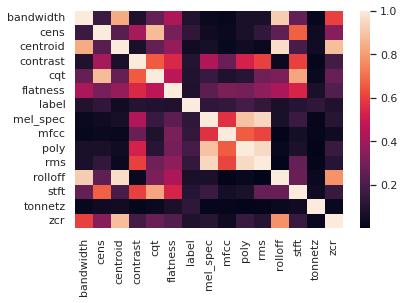

In [ ]:
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(abs(data.corr()))

In [ ]:
abs(data.corr()['label']).sort_values(ascending=False)

label        1.000000
poly         0.183093
rms          0.137130
mfcc         0.135439
cens         0.127079
tonnetz      0.123560
mel_spec     0.122699
stft         0.100380
contrast     0.096731
cqt          0.090500
bandwidth    0.087972
flatness     0.083450
zcr          0.083425
rolloff      0.069138
centroid     0.047199
Name: label, dtype: float64

In [ ]:
# columns2 = set(hop_data.columns)-set(['label','stft','flatness',])

In [ ]:
columns2 = set(data.columns)-set(['label','centroid',  'rolloff','contrast', 'bandwidth', 'mfcc','cqt'])#, 'centroid','rolloff', 'cqt','zcr','bandwidth','stft','flatness','contrast','mfcc','mel_spec'])

X_data_train = data[columns2]
X_data_val = val_data[columns2]
y_labels_train = data['label']
y_labels_val = val_data['label']

In [ ]:
X_data_train

,flatness,rms,stft,tonnetz,mel_spec,poly,cens,zcr
0,0.047284,0.007982,0.406927,-0.004187,0.026398,0.099071,0.281607,0.194846
1,0.037966,0.011660,0.389956,-0.003420,0.047970,0.132576,0.278701,0.208850
2,0.047284,0.007982,0.406927,-0.004187,0.026398,0.099071,0.281607,0.194846
3,0.005109,0.100814,0.242540,-0.007820,2.632843,0.856858,0.239254,0.121606
4,0.079977,0.026979,0.370631,-0.006453,0.403566,0.217406,0.245223,0.085695
...,...,...,...,...,...,...,...,...
237,0.009224,0.010504,0.358461,-0.015427,0.046964,0.104754,0.267304,0.081134
238,0.006631,0.025154,0.263853,-0.001028,0.163880,0.247129,0.229574,0.120916
239,0.011993,0.059118,0.365359,0.004466,1.014855,0.670990,0.264767,0.170562
240,0.010264,0.070384,0.366224,0.008187,1.480361,0.795707,0.264062,0.149471


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_data_train, y_labels_train)

# import pickle
# knnPickle = open('knnpickle_file', 'wb') 

# # source, destination 
# pickle.dump(knn, knnPickle)  

# # close the file
# knnPickle.close()

In [ ]:
# y_train_pred = knn.predict(X_data_train)
# y_test_pred = knn.predict(X_data_val)
# y_test_pred_prob = knn.predict_proba(X_data_val)
# metrics.matthews_corrcoef(y_labels_val, y_test_pred)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

0.13918088526095473

In [ ]:
# from sklearn.metrics import accuracy_score
# print("Training Accuracy is ", accuracy_score(y_labels_train,y_train_pred)*100)
# print("Validation Accuracy is ", accuracy_score(y_labels_val,y_test_pred)*100)

Training Accuracy is  87.60330578512396
Validation Accuracy is  82.40343347639485


In [ ]:
val_data

,bandwidth,cens,centroid,contrast,cqt,flatness,label,mel_spec,mfcc,poly,rms,rolloff,stft,tonnetz,zcr
0,1462.481925,0.238436,1790.820957,18.884179,0.363998,0.032902,1.0,1.197696,-25.801256,0.436607,0.055365,3101.685645,0.319165,-0.003809,0.135127
1,1592.591439,0.259341,1829.332562,18.039325,0.471418,0.055235,1.0,1.831692,-24.093441,0.581282,0.064412,3320.038803,0.376040,-0.004558,0.130815
2,1835.059954,0.264006,2481.862083,19.244464,0.438234,0.048351,1.0,0.604627,-24.878969,0.359238,0.037629,4472.297482,0.345360,-0.003820,0.177792
3,1775.421047,0.244246,2178.935474,18.706819,0.375352,0.153275,0.0,0.175625,-25.306536,0.189977,0.021400,3929.960504,0.288857,0.005448,0.110380
4,1712.503906,0.254555,2002.181768,19.250089,0.366872,0.021514,0.0,0.307559,-21.719664,0.301759,0.030092,3521.045754,0.314880,0.007025,0.113204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1877.438451,0.207396,1745.335048,21.507319,0.333529,0.007473,0.0,6.396447,-11.734622,1.036413,0.145546,3415.166016,0.271764,0.009931,0.072009
229,2105.248750,0.208576,2165.103731,21.582058,0.324239,0.019991,0.0,4.901514,-13.426838,0.763872,0.121745,4396.863543,0.265606,0.023832,0.083641
230,1498.610835,0.267810,1510.869389,19.091773,0.460864,0.013113,0.0,5.369079,-14.511930,1.202090,0.119385,2667.074452,0.350763,-0.004045,0.094603
231,1659.155403,0.263560,1949.327686,18.803004,0.476745,0.007687,0.0,3.278467,-14.121465,1.104018,0.102195,3252.928262,0.318391,0.000785,0.139125


0.5866197183098592


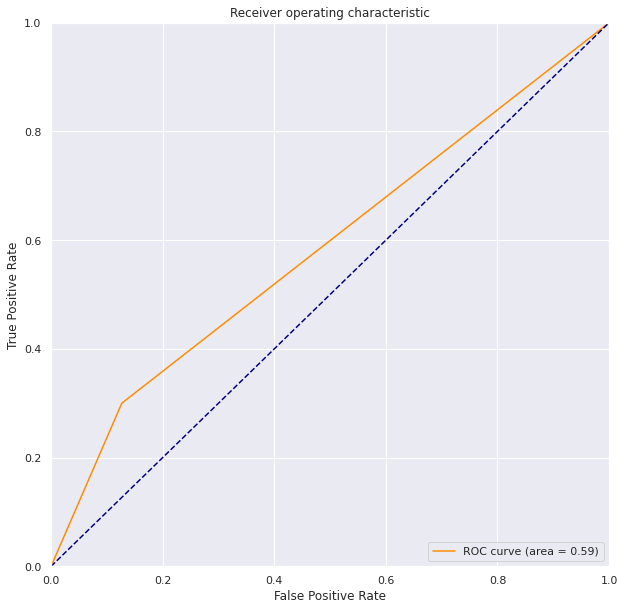

In [ ]:
# fpr, tpr, _ = metrics.roc_curve(y_test_pred,  y_labels_val)
# roc_auc = metrics.auc(fpr, tpr)
# print(roc_auc)

# sns.set(rc={'figure.figsize':(10,10)})
# plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
# labels=np.sort(y_labels_val.unique())
# cm = metrics.confusion_matrix(y_labels_val,y_test_pred, labels=labels)
# print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[186  14]
 [ 27   6]]


## Undersampling

In [ ]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 KB 29.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

In [ ]:
X_data_balanced, y_labels_balanced = cc.fit_resample(X_data_train, y_labels_train)

In [ ]:
y_labels_balanced.shape

(114,)

## KNN

In [ ]:
data

,bandwidth,cens,centroid,contrast,cqt,flatness,label,mel_spec,mfcc,poly,rms,rolloff,stft,tonnetz,zcr
0,2187.410228,0.281607,2768.525359,17.817493,0.598000,0.047284,0.0,0.026398,-21.974230,0.099071,0.007982,5209.689331,0.406927,-0.004187,0.194846
1,2167.631283,0.278701,2883.452818,18.893784,0.542807,0.037966,0.0,0.047970,-20.659327,0.132576,0.011660,5385.345073,0.389956,-0.003420,0.208850
2,2187.410228,0.281607,2768.525359,17.817493,0.598000,0.047284,0.0,0.026398,-21.974230,0.099071,0.007982,5209.689331,0.406927,-0.004187,0.194846
3,2205.656533,0.239254,2340.511793,24.157594,0.302096,0.005109,0.0,2.632843,-13.697724,0.856858,0.100814,4715.597830,0.242540,-0.007820,0.121606
4,2305.293818,0.245223,2473.061818,18.892041,0.431043,0.079977,0.0,0.403566,-20.701094,0.217406,0.026979,4873.525603,0.370631,-0.006453,0.085695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2148.645475,0.267304,1863.448131,18.498728,0.515285,0.009224,1.0,0.046964,-19.559860,0.104754,0.010504,4013.188136,0.358461,-0.015427,0.081134
245,1996.766637,0.229574,2035.401987,21.861430,0.370597,0.006631,1.0,0.163880,-18.415936,0.247129,0.025154,3969.653855,0.263853,-0.001028,0.120916
246,2226.881153,0.264767,2526.994027,22.017882,0.459645,0.011993,1.0,1.014855,-14.335493,0.670990,0.059118,4681.196417,0.365359,0.004466,0.170562
247,2063.996913,0.264062,2227.363430,22.012002,0.452654,0.010264,1.0,1.480361,-13.252786,0.795707,0.070384,4120.431595,0.366224,0.008187,0.149471


In [ ]:
abs(data.corr()['label']).sort_values()

centroid     0.041839
rolloff      0.064587
bandwidth    0.084102
zcr          0.084224
cqt          0.084396
flatness     0.085478
stft         0.096663
contrast     0.108704
mfcc         0.119363
mel_spec     0.121521
tonnetz      0.122596
cens         0.128947
rms          0.136631
poly         0.183643
label        1.000000
Name: label, dtype: float64

In [ ]:
columns2 = set(data.columns)-set(['label','centroid','rolloff'])#,'bandwidth','zcr','cqt',])#'flatness','stft'])#,'flatness'])#, 'centroid','rolloff', 'cqt','zcr','bandwidth','stft','flatness','contrast','mfcc','mel_spec'])
X_data_train = data[columns2]
X_data_val = val_data[columns2]

In [ ]:
X_data_train.head(1)

,mfcc,cqt,flatness,rms,stft,tonnetz,bandwidth,mel_spec,poly,cens,contrast,zcr
0,-21.97423,0.598,0.047284,0.007982,0.406927,-0.004187,2187.410228,0.026398,0.099071,0.281607,17.817493,0.194846


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_data_train, y_labels_train)

# import pickle
# filename = 'KNN_pickle'
# pickle.dump(knn, open(filename, 'wb'))

KNeighborsClassifier()

In [ ]:
y_train_pred = knn.predict(X_data_train)
y_test_pred = knn.predict(X_data_val)
y_test_pred_prob = knn.predict_proba(X_data_val)
metrics.matthews_corrcoef(y_labels_val, y_test_pred)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

0.15627779754316282

In [ ]:
print("Training Accuracy is ", accuracy_score(y_labels_train,y_train_pred)*100)
print("Validation Accuracy is ", accuracy_score(y_labels_val,y_test_pred)*100)

Training Accuracy is  79.51807228915662
Validation Accuracy is  84.12017167381974


In [ ]:
labels=np.sort(y_labels_val.unique())
cm = metrics.confusion_matrix(y_labels_val,y_test_pred, labels=labels)
print("Confusion Matrix: \n", cm)



Confusion Matrix: 
 [[191   9]
 [ 28   5]]


In [ ]:
y_train_pred

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
y_test_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

0.6010558069381599


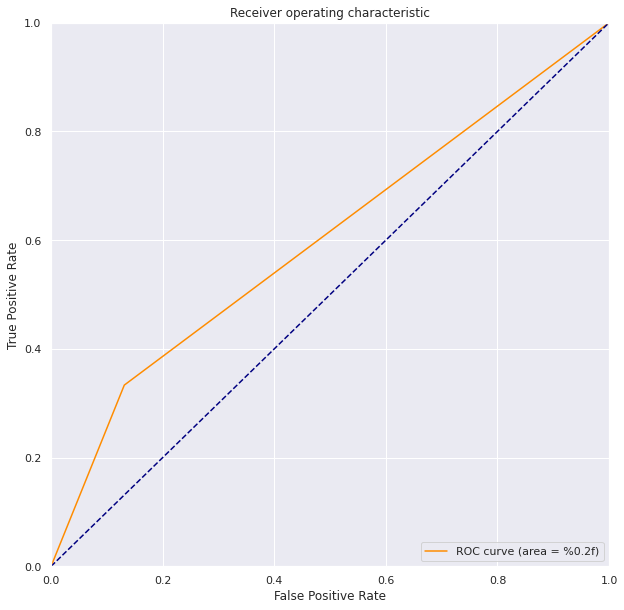

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_pred,  y_labels_val)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

sns.set(rc={'figure.figsize':(10,10)})
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#rfc = tree.DecisionTreeClassifier()
rfc = RandomForestClassifier()
rfc.fit(X_data_train, y_labels_train)

import pickle
filename = 'RF_dep.sav'
pickle.dump(rfc, open(filename, 'wb'))
y_val_pred = rfc.predict(X_data_val)
y_val_pred_prob = rfc.predict_proba(X_data_val)

labels=np.sort(y_labels_val.unique())
cm = metrics.confusion_matrix(y_labels_val,y_val_pred, labels=labels)

#plot_cmatrix(cm, labels, title='Confusion Matrix Random')
print("Validation Accuracy is ", accuracy_score(y_labels_val,y_val_pred)*100)

Validation Accuracy is  83.2618025751073


In [ ]:
y_val_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1.

In [ ]:
cm

array([[192,   8],
       [ 29,   4]])

0.42731277533039647


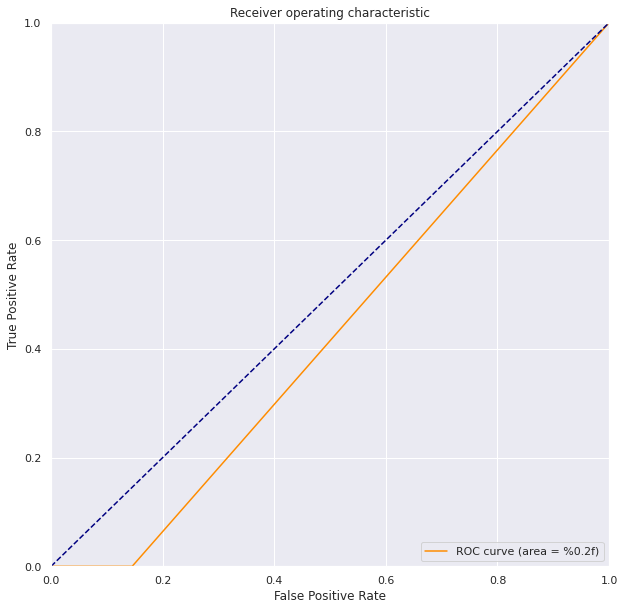

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_val_pred,  y_labels_val)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

sns.set(rc={'figure.figsize':(10,10)})
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## SVM

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
svm_high = SVC(gamma=0.1, C=1)
svm_high.fit(X_data_train, y_labels_train)

y_train_pred_high=svm_high.predict(X_data_train)
print("Training Accuracy is ", accuracy_score(y_labels_train, y_train_pred_high)*100)
y_val_pred_high=svm_high.predict(X_data_val)
print("Validation Accuracy is ", accuracy_score(y_labels_val,y_val_pred_high)*100)

Training Accuracy is  95.98393574297188
Validation Accuracy is  84.97854077253218


In [ ]:
y_val_pred_high

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:

cm = metrics.confusion_matrix(y_labels_val, y_val_pred_high, labels=labels)
cm

array([[198,   2],
       [ 33,   0]])

0.4285714285714286


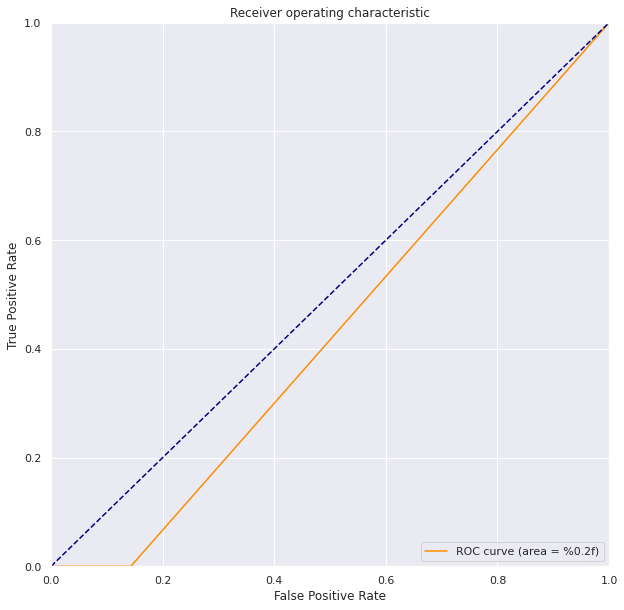

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_val_pred_high,  y_labels_val)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

sns.set(rc={'figure.figsize':(10,10)})
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [ ]:
# #columns = ['bandwidth_pos','bandwidth_neu','bandwidth_neg','flatness_neg','flatness_neu','flatness_pos','centroid_neg','centroid_neu','centroid_pos', 'rolloff_neg', 'contrast_neg', 'mfcc_neg', 'zcr_neg', 'rolloff_neu', 'contrast_neu', 'mfcc_neu', 'zcr_neu', 'rolloff_pos', 'contrast_pos', 'mfcc_pos', 'zcr_pos']
# #columns2 = set(hop_data.columns)-set(['label','stft'])
# X_hop_data_train = data[columns2]
# X_hop_data_val = val_data[columns2]

# y_hop_labels_train = data['label']
# y_hop_labels_val = val_data['label']

# from sklearn.linear_model import LogisticRegression
# hop_logreg = LogisticRegression()
# hop_logreg.fit(X_data_train, y_labels_train)

In [ ]:
# from sklearn.metrics import accuracy_score
# # Printing accuracy of testing & training data
# y_hop_train_pred=hop_logreg.predict(X_data_train)
# print("Training Accuracy is ", accuracy_score(y_labels_train, y_train_pred)*100)
# y_hop_val_pred=hop_logreg.predict(X_hop_data_val)
# print("Validation Accuracy is ", accuracy_score(y_labels_val,y_val_pred)*100)

In [ ]:
abs(data.corr()['label']).sort_values()
columns2 = set(data.columns)-set(['label','centroid','rolloff','zcr','bandwidth','cqt','stft'])#, 'centroid','rolloff', 'cqt','zcr','bandwidth','stft','flatness','contrast','mfcc','mel_spec'])
X_data_train = data[columns2]
X_data_val = val_data[columns2]

In [ ]:
#columns = ['bandwidth_pos','bandwidth_neu','bandwidth_neg','flatness_neg','flatness_neu','flatness_pos','centroid_neg','centroid_neu','centroid_pos', 'rolloff_neg', 'contrast_neg', 'mfcc_neg', 'zcr_neg', 'rolloff_neu', 'contrast_neu', 'mfcc_neu', 'zcr_neu', 'rolloff_pos', 'contrast_pos', 'mfcc_pos', 'zcr_pos']
#columns2 = set(data.columns)-set(['label','centroid','rolloff','zcr','bandwidth','cqt','stft'])#, 'centroid','rolloff', 'cqt','zcr','bandwidth','stft','flatness','contrast','mfcc','mel_spec'])
X_data_train = data[columns2]
X_data_val = val_data[columns2]

y_labels_train = data['label']
y_labels_val = val_data['label']

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_data_train, y_labels_train)
import pickle
filename = 'finalized_model.sav'
pickle.dump(logreg, open(filename, 'wb'))
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)

In [ ]:
from sklearn.metrics import accuracy_score
# Printing accuracy of testing & training data
y_train_pred=logreg.predict(X_data_train)
print("Training Accuracy is ", accuracy_score(y_labels_train, y_train_pred)*100)
y_val_pred=logreg.predict(X_data_val)
print("Validation Accuracy is ", accuracy_score(y_labels_val,y_val_pred)*100)

NameError: name 'logreg' is not defined

In [ ]:
y_val_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
nan


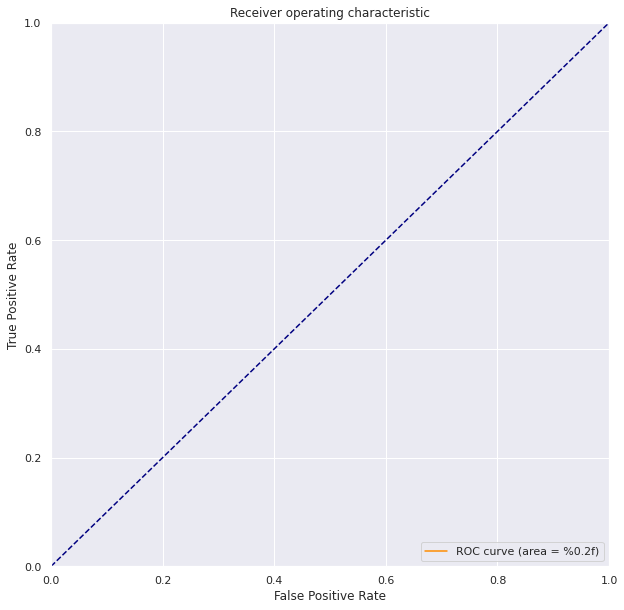

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_val_pred,  y_labels_val)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

sns.set(rc={'figure.figsize':(10,10)})
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:

cm = metrics.confusion_matrix(y_labels_val, y_val_pred, labels=labels)
cm



array([[200,   0],
       [ 33,   0]])

## ROC Curve

In [ ]:
"""
X_data_train = data[columns2]
X_data_val = val_data[columns2]
y_labels_train = data['label']
y_labels_val = val_data['label']
"""

"\nX_data_train = data[columns2]\nX_data_val = val_data[columns2]\ny_labels_train = data['label']\ny_labels_val = val_data['label']\n"

In [ ]:
# test_pred = pd.DataFrame(model.predict(X_data_val))
# test_predict = test_pred.idxmax(axis=1)
# test_labels_one_hot = pd.DataFrame(y_labels_val)

In [ ]:
# fpr = {}
# tpr = {}
# roc_auc = {}

# plt.figure(figsize=(14,10))
# for i in range(5):
#     fpr[i], tpr[i], _ = metrics.roc_curve(test_labels_one_hot.iloc[:, i], test_pred.iloc[:, i])
#     roc_auc[i] = metrics.auc(fpr[i], tpr[i])
#     plt.plot(fpr[i], tpr[i], label = stage_dict[i] + ', ' + str(i))

# plt.plot([0, 1], [0, 1])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Multi-Class ROC Curve')
# plt.legend()
# plt.show()

# fpr["micro"], tpr["micro"], _ = metrics.roc_curve(test_labels_one_hot.values.ravel(), test_pred.values.ravel())
# roc_auc_agg = metrics.auc(fpr["micro"], tpr["micro"])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=311e6adc-3eb1-4202-832e-d715f09028ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>